# Feature Selection

In [23]:
# Automatic File Naming Utility
from output_util import OutputUtil

outputUtil = OutputUtil()

In [24]:
import pandas as pd
from globals import BINNING_OUTPUT_PATH

# Set pandas display options
pd.set_option('display.max_rows', None)  # Replace None with a specific number if you prefer
pd.set_option('display.max_columns', None)  # Adjust accordingly if you have many columns

df = pd.read_csv(BINNING_OUTPUT_PATH)


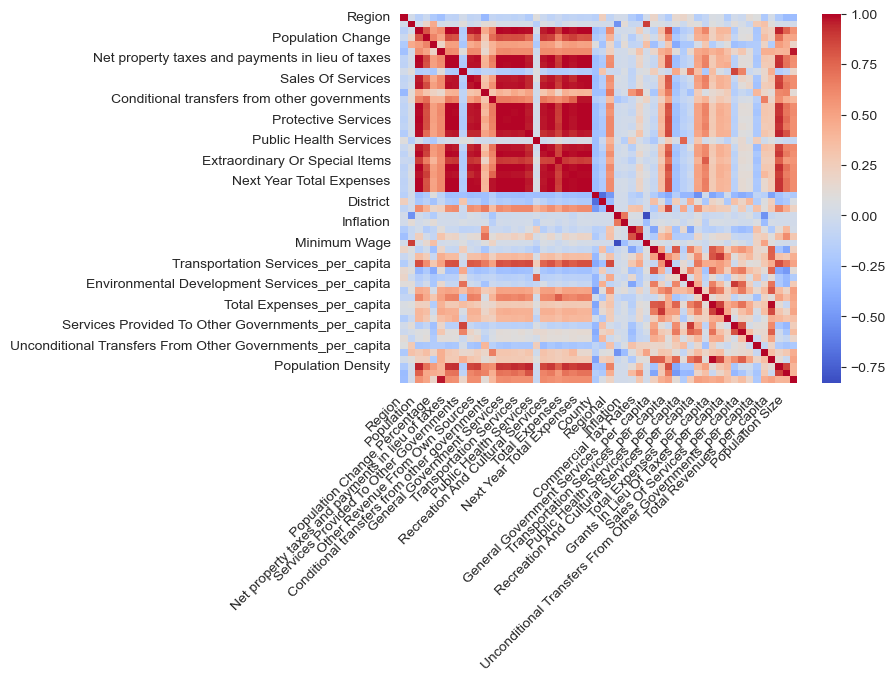

In [25]:

from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

df['Region'] = LabelEncoder().fit_transform(df['Region'])
df['Population Size'] = LabelEncoder().fit_transform(df['Population Size'])
df['Land Area Size'] = LabelEncoder().fit_transform(df['Land Area Size'])

corrs = df.corr()

plt.figure()
sns.heatmap(corrs, annot=False, cmap='coolwarm')
plt.xticks(rotation=45, ha='right')
plt.show()


In [26]:


features = [
    "Next Year Total Expenses",
    "Next Year Total Revenues",
    "Total Expenses",
    "Total Revenues",
]

for feature in features:
    expenseCorr = corrs[feature]
    expenseCorr = expenseCorr.sort_values(ascending=False)
    expenseCorr.to_csv("../output/corrs/" + feature + ".csv", index=True)
